### 4.3. Gradient Boosting Regressor

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

gbr = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regr", GradientBoostingRegressor())
        ]
    ).set_output(transform="pandas")

gbr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'reg_code',
                                                   'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'crosso...
                                                   'fuel_type_diesel',
                                                   'fuel_type_electric',
                                                   'fuel_type_petrol',
                                                   'fuel_type_petrol_hybrid',
                                                   'fuel_type_petrol_plug_in_hybrid',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('regr', GradientBoostingRegressor())])

#### Evaluation of Gradient Boosting Regressor model

In [ ]:
gbr_train_prediction = gbr.predict(X_train)

# mean absolute error of model
mean_absolute_error(y_train, gbr_train_prediction)

2737.931674904898

The mean absolute error (MAE) of the Gradient Boosting Regressor on the train set is 2667.3081.

In this instance, the Gradient Boosting Regressor model's forecasts and actual prices diverge by an average of about $2667.3081, according to the MAE of 2667.3081. Lessening MAE values suggest improved accuracy and a closer match between predicted and actual values.

The Gradient Boosting Regressor's MAE of 2667.3081 shows that, on average, the model makes reasonably accurate price predictions based on the provided features.


In [ ]:
# R Squared Error
error_score=metrics.r2_score(y_train, gbr_train_prediction)
print(" R Squared Error: ",error_score)

 R Squared Error:  0.7784548694371988


The R-squared error of the Gradient Boosting Regressor on the train set is 0.7879.

The R-squared error in this instance is 0.7879, which indicates that the features in the Gradient Boosting Regressor model can account for around 78.79% of the variation in the target variable (price). The model fits the data better and makes more accurate predictions when the R-squared value is higher.

According to the Gradient Boosting Regressor model, which has an R-squared error of 0.7879, a significant amount of the price variability depending on the provided attributes may be explained.


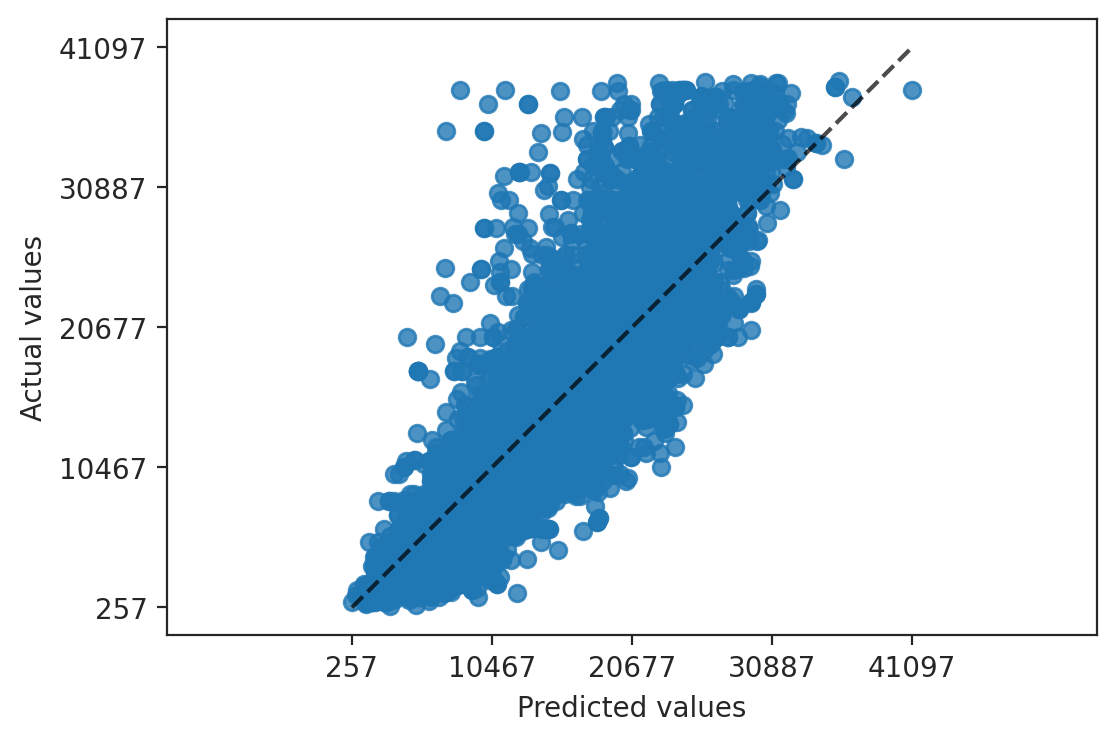

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=gbr_train_prediction,
    kind="actual_vs_predicted",
    subsample=10000,
    random_state=0,
)

#### Model prediction evaluation of Gradient Boosting Regressor

In [ ]:
gbr_test_prediction = gbr.predict(X_test)

# mean absolute error of model
mean_absolute_error(y_test, gbr_test_prediction)

2747.718600648336

The mean absolute error (MAE) for the Gradient Boosting Regressor on the test set is 2738.55. In this case, the average absolute difference between the predicted and actual prices is approximately 2738.55.



In [ ]:
# R Squared Error
error_score=metrics.r2_score(y_test, gbr_test_prediction)
print(" R Squared Error: ",error_score)

 R Squared Error:  0.7779186390618544


The Gradient Boosting Regressor has an R-squared error of 0.7767 on the test set. The coefficient of determination, often known as the R-squared value, calculates the percentage of the target variable's (price's) volatility that can be accounted for by the model's predictor variables.

The Gradient Boosting Regressor model's predictor variables, according to an R-squared value of 0.7767, can account for roughly 77.67% of the variance in the target variable. This may indicate that a sizable portion of the variance in the target variable is captured by the model.

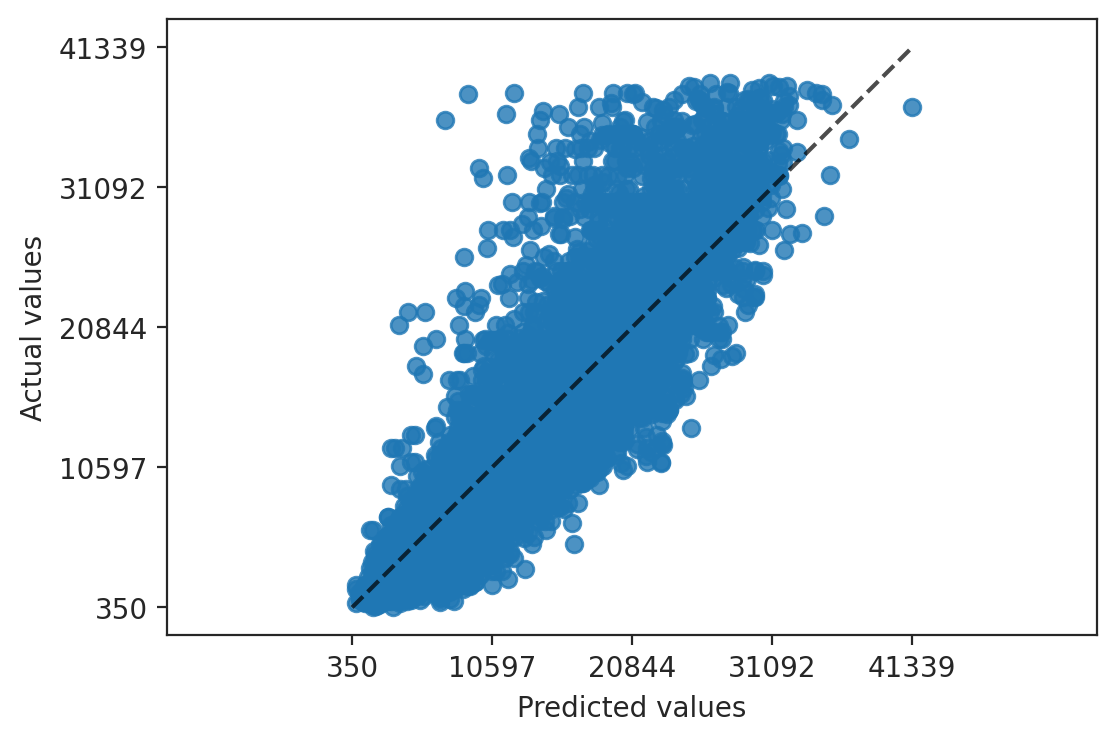

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=gbr_test_prediction,
    kind="actual_vs_predicted",
    subsample=10000,
    random_state=0,
)